In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pylab
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


IMPORTING DATA SET

In [3]:
dataset = pd.read_csv("C:\\Users\\kumar\\Python Assign\\MLR\\Dataset\\50_startups.csv")


In [4]:
dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
type(dataset)

pandas.core.frame.DataFrame

In [6]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

ASSIGNING COLUMNS TO LISTS AND ROW DATA TO LIST VARIABLES

In [7]:
RDSpend=dataset['R&D Spend']
Administration=dataset['Administration']
MarketingSpend=dataset['Marketing Spend']
State=dataset['State']
Profit=dataset['Profit']


# EXPLORATORY DATA ANALYSIS


1ST BUSINESS MOMENT DECISION

In [9]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


2ND BUSINESS MOMENT DECISION

In [10]:
#2-->Variance,Standard Deviation and Range:

In [11]:
print("Variances:")
print("-------------------------------")
print(np.var(dataset))
print("\nStandard Deviation:")
print("-------------------------------")
print(np.std(dataset))
print("\nRange")
print("-------------------------------")
for c in dataset.columns:
    if c == "State":
        continue
    else:
        print(c+":    "+str(max(dataset[c])-min(dataset[c])))

Variances:
-------------------------------
R&D Spend          2.064877e+09
Administration     7.692973e+08
Marketing Spend    1.465582e+10
Profit             1.592096e+09
dtype: float64

Standard Deviation:
-------------------------------
R&D Spend           45440.915563
Administration      27736.209651
Marketing Spend    121061.231183
Profit              39901.082817
dtype: float64

Range
-------------------------------
R&D Spend:    165349.2
Administration:    131362.41999999998
Marketing Spend:    471784.1
Profit:    177580.43


3RD BUSINESS MOMENT DECISION

In [12]:
 # 3 -->Skewnes:

In [14]:
for c in dataset.columns:
    if c == "State":
        continue
    else:
        print(c+":    "+ str(stats.skew(dataset[c])))


R&D Spend:    0.15904052321503395
Administration:    -0.4742300698920047
Marketing Spend:    -0.04506631617666136
Profit:    0.02258638356958943


4TH BUSINESS MOMENT DECISION

In [15]:
# 4 -->Kurtosis:

In [16]:
for c in dataset.columns:
    if c == "State":
        continue
    else:
        print(c+":    "+ str(stats.kurtosis(dataset[c])))



R&D Spend:    -0.8050676431519039
Administration:    0.08553840791984113
Marketing Spend:    -0.7240327111087308
Profit:    -0.17529637679752152


##### GRAPHS 

Distributions based on the variable "State" and Independent Variables 

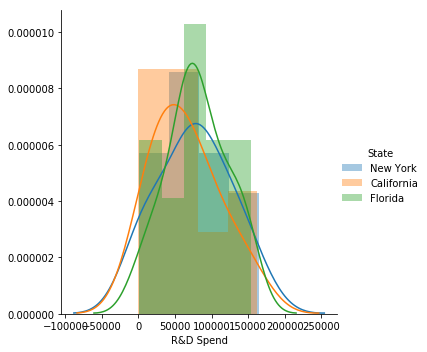

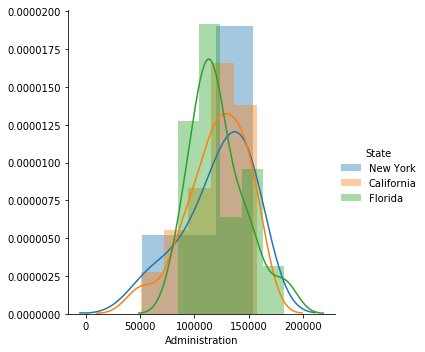

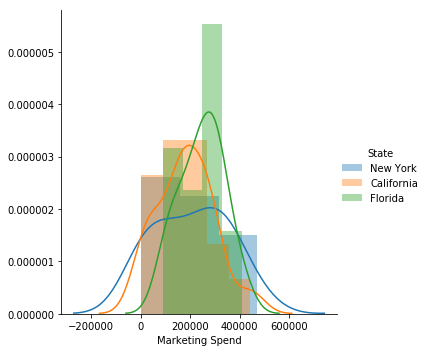

In [17]:
for c in dataset.columns:
    if c == "State" or c=="Profit":
        continue
    else:
        sns.FacetGrid(dataset,hue="State",height=5)        .map(sns.distplot,c)        .add_legend()
        plt.show()


Box Plot


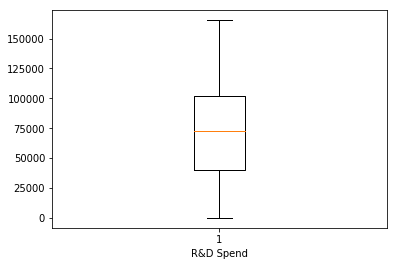

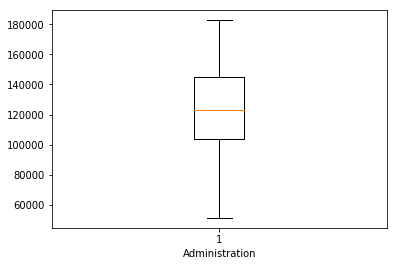

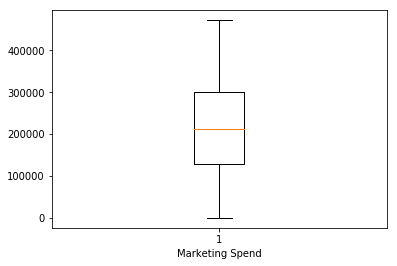

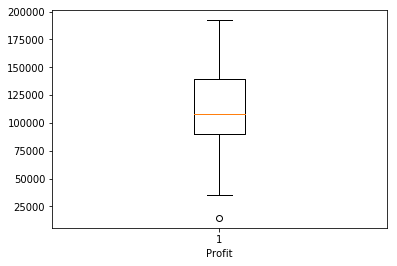

In [18]:
for c in dataset.columns:
    if c == "State":
        continue
    else:
        plt.boxplot(dataset[c])
        plt.xlabel(c)
        plt.show()


## CHECKING ASSUMPTIONS 

### LINEARITY

In [19]:
#PLOTTING PAIRPLOT

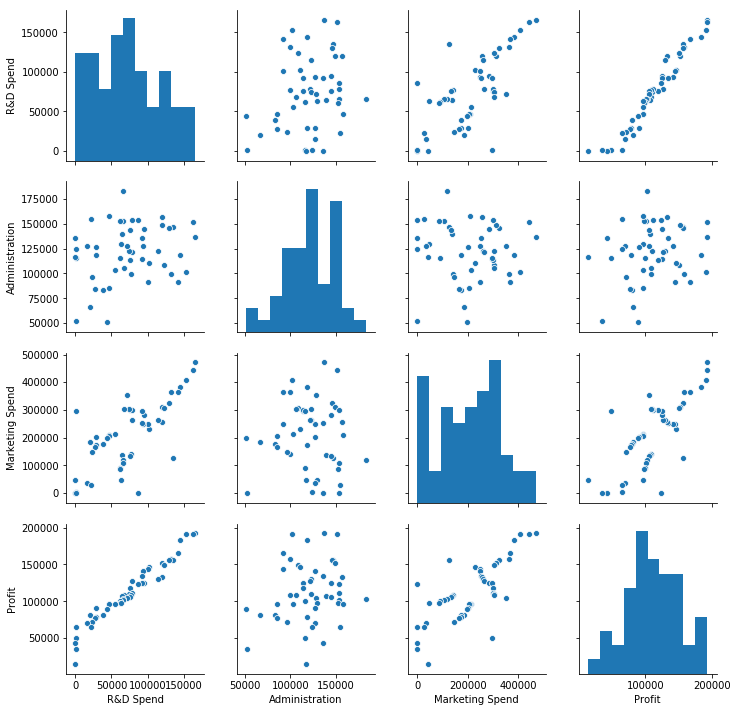

In [22]:
sns.pairplot(start.iloc[:,:])


## OBSERVATIONS:
#####  1. ALL INDEPENDENT VARIABLES ARE IN LINEAR RELATIONSHIP WITH DEPENDENT VARIABLE.
#####   2. ALL ARE NOT UNIFORMLY DISTRIBUTED AND MAY CONTAIN SOME OUTLIERS.

In [24]:
dataset.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


-->ADMINISTRATION HAS LOW CORRELATION WITH PROFIT IT MEANS IT SIGNIFICANTLY DOES NOT INFLUENCE IT.                              
--> MARKETING SPEND AND RD SPEND ARE CORRELATED THAT MEANS MULTI COLLINEARITY EXISTS.

##### BUILDING MODEL

In [25]:
model1 = smf.ols('Profit~RDSpend+Administration+State+MarketingSpend',data=start).fit()
model1.params


Intercept            50125.343832
State[T.Florida]       198.788793
State[T.New York]      -41.887019
RDSpend                  0.806023
Administration          -0.027004
MarketingSpend           0.026980
dtype: float64

In [26]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Tue, 04 Jun 2019   Prob (F-statistic):           1.34e-27
Time:                        13:07:27   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
State[T.Florida]    198.7888   3371.007      0.059      0.953   -6595.030    6992.607
State[T.New York]   -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
RDSpend               0.8060      0.046     17.369      0.000       0.712       0.900
Administration       -0.0270      0.052     -0.517      0.608      -0.132       0.078
MarketingSpend        0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### OBSERVATIONS:
##### 1. P VALUE FOR ADMINISTRATION>0.05 IT IS INSIGNIFICNAT FOR THE MODEL. BUT WE WILL NOT REMOVE HERE AND REMOVE THE VARIABLE IF ITS VIF VALUE SARE HIGH.


In [286]:
model1.conf_int(0.01)

,0,1
Intercept,31589.493310,68661.194354
State[T.Florida],-8876.900421,9274.478006
State[T.New York],-8808.050396,8724.276357
RDSpend,0.681083,0.930964
Administration,-0.167626,0.113618
MarketingSpend,-0.019172,0.073131


### VARIABLE REGRSSION

In [27]:
m1_a =smf.ols('Profit~Administration',data=dataset).fit()
m1_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Tue, 04 Jun 2019   Prob (F-statistic):              0.162
Time:                        13:18:18   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
m1_r =smf.ols('Profit~RDSpend',data=dataset).fit()
m1_r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Tue, 04 Jun 2019   Prob (F-statistic):           3.50e-32
Time:                        13:18:56   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RDSpend        0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
m1_m =smf.ols('Profit~MarketingSpend',data=dataset).fit()
m1_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Tue, 04 Jun 2019   Prob (F-statistic):           4.38e-10
Time:                        13:19:45   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept           6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MarketingSpend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
# though administration individually correlated with profit but when kept with another variables has less significance..

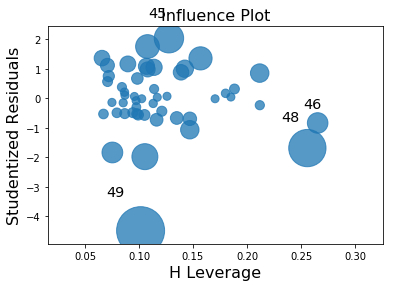

In [39]:
sm.graphics.influence_plot(model1)
plt.show()


In [53]:
infl = model1.get_influence()
sm_fr = infl.summary_frame()

In [54]:
sm_fr

,dfb_Intercept,dfb_State[T.Florida],dfb_State[T.New York],dfb_RDSpend,dfb_Administration,dfb_MarketingSpend,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.002627,0.001137,-0.002293,-0.000680,-0.001084,-0.002943,0.000008,-0.014975,0.170451,-0.006788,-0.014804,-0.006710
1,-0.049608,-0.082437,-0.070955,0.020841,0.046268,0.058280,0.003960,0.319946,0.188385,0.154143,0.316658,0.152559
2,0.080109,0.153248,-0.028648,0.197811,-0.174765,-0.013702,0.027895,1.003787,0.142447,0.409108,1.003876,0.409144
3,-0.035947,-0.047849,0.163879,0.110000,-0.049701,0.073783,0.023571,1.048610,0.113958,0.376063,1.049827,0.376499
4,-0.104342,-0.115870,0.017478,-0.153851,0.163418,0.047737,0.014023,-0.698507,0.147083,-0.290067,-0.694385,-0.288355
5,-0.046292,0.027220,-0.115816,-0.081405,0.105665,-0.033055,0.011710,-0.730587,0.116320,-0.265065,-0.726658,-0.263639
6,-0.021299,0.037236,0.050562,-0.095187,0.004676,0.082074,0.002493,-0.235897,0.211863,-0.122306,-0.233349,-0.120985
7,0.056695,-0.079214,0.007763,-0.045130,-0.041183,0.001538,0.004165,-0.490128,0.094234,-0.158090,-0.485855,-0.156712
8,-0.010483,-0.002030,0.010515,0.000992,0.008446,0.005091,0.000073,0.064286,0.095764,0.020921,0.063555,0.020683
9,-0.073333,0.113458,0.114051,-0.087676,0.064819,0.009105,0.006314,-0.567773,0.105163,-0.194641,-0.563352,-0.193125


#### FROM GRAPH AND COOKS_d VALUES WE FOUND 49 IS AN INFLENTIAL POINT .SO REMOVE THAT INFLUENTIAL POINT.

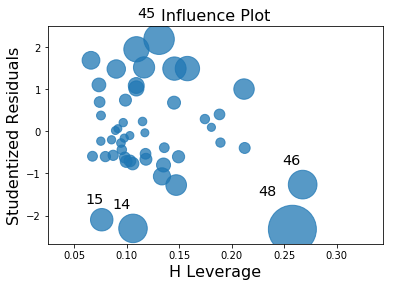

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Profit_new   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     216.6
Date:                Tue, 04 Jun 2019   Prob (F-statistic):           2.51e-29
Time:                        16:36:48   Log-Likelihood:                -505.97
No. Observations:                  49   AIC:                             1024.
Df Residuals:                      43   BIC:                             1035.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              5.338e+04   5794.239      9.212      0.000    4.17e+04    6.51e+04
State_new[T.Florida]  -1564.2242   2842.017     -0.550      0.585   -7295.698    4167.249
State_new[T.New York] -1954.0177   2751.932     -0.710      0.482   -7503.818    3595.783
RDSpend_new               0.7836      0.039     20.056      0.000       0.705       0.862
Administration_new       -0.0220      0.044     -0.505      0.616      -0.110       0.066
MarketingSpend_new        0.0258      0.014      1.804      0.078      -0.003       0.055
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.207
Skew:                           0.061   Prob(JB):                        0.902
Kurtosis:                       2.705   Cond. No.                     1.46e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
new_dataset = dataset.drop(dataset.index[[49]],axis=0)
RDSpend_new=new_dataset['R&D Spend']
Administration_new=new_dataset['Administration']
MarketingSpend_new=new_dataset['Marketing Spend']
State_new=new_dataset['State']
Profit_new=new_dataset['Profit']
model1_new = smf.ols('Profit_new~RDSpend_new+Administration_new+State_new+MarketingSpend_new',data=new_dataset).fit()
sm.graphics.influence_plot(model1_new)
plt.show()

model1_new.summary()


In [66]:
new_dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


###### WE CAN SEE THAT THERE IS A CHANGE IN P VALUE FOR MARKETNG SPEND AFTER REMOVING INFLUENTIAL POINTS BUT NOT IN ADMINISTRATION....

In [67]:
#Lets drop row-48 and see the results

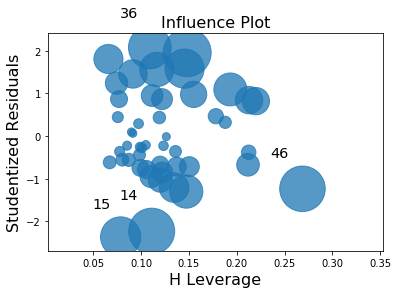

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Profit_new2   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     217.6
Date:                Tue, 04 Jun 2019   Prob (F-statistic):           7.02e-29
Time:                        16:54:11   Log-Likelihood:                -493.23
No. Observations:                  48   AIC:                             998.5
Df Residuals:                      42   BIC:                             1010.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               5.939e+04   6093.634      9.746      0.000    4.71e+04    7.17e+04
State_new2[T.Florida]  -1150.1897   2712.520     -0.424      0.674   -6624.276    4323.896
State_new2[T.New York]  -665.7875   2678.779     -0.249      0.805   -6071.783    4740.208
RDSpend_new2               0.7888      0.037     21.160      0.000       0.714       0.864
Administration_new2       -0.0621      0.045     -1.381      0.174      -0.153       0.029
MarketingSpend_new2        0.0179      0.014      1.275      0.209      -0.010       0.046
==============================================================================
Omnibus:                        0.267   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.875   Jarque-Bera (JB):                0.453
Skew:                           0.108   Prob(JB):                        0.797
Kurtosis:                       2.576   Cond. No.                     1.60e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
new_dataset2 = dataset.drop(dataset.index[[49,48]],axis=0)
RDSpend_new2=new_dataset2['R&D Spend']
Administration_new2=new_dataset2['Administration']
MarketingSpend_new2=new_dataset2['Marketing Spend']
State_new2=new_dataset2['State']
Profit_new2=new_dataset2['Profit']
model1_new2 = smf.ols('Profit_new2~RDSpend_new2+Administration_new2+State_new2+MarketingSpend_new2',data=new_dataset2).fit()
sm.graphics.influence_plot(model1_new2)
plt.show()

model1_new2.summary()


##### THERE IS NO CHANGE IN ADMINISTRATION AND BY REMOVING 48 POINT WE SEE P VALUE BECOME INSIGNIFICNAT FOR MARKETING SPEND ..... SO KEEP 48 IN DATASET AND REMOVE ADMINISTRATION IF WE HAVE ANY DOUBTS IT CAN BE CLEARED BY CHECKING VUF VALUES...

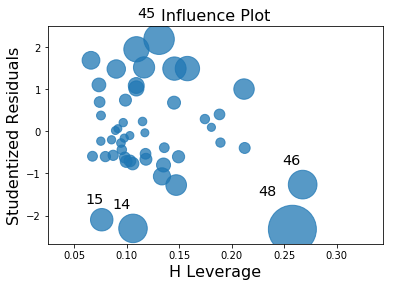

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Profit_new   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     216.6
Date:                Tue, 04 Jun 2019   Prob (F-statistic):           2.51e-29
Time:                        16:54:33   Log-Likelihood:                -505.97
No. Observations:                  49   AIC:                             1024.
Df Residuals:                      43   BIC:                             1035.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              5.338e+04   5794.239      9.212      0.000    4.17e+04    6.51e+04
State_new[T.Florida]  -1564.2242   2842.017     -0.550      0.585   -7295.698    4167.249
State_new[T.New York] -1954.0177   2751.932     -0.710      0.482   -7503.818    3595.783
RDSpend_new               0.7836      0.039     20.056      0.000       0.705       0.862
Administration_new       -0.0220      0.044     -0.505      0.616      -0.110       0.066
MarketingSpend_new        0.0258      0.014      1.804      0.078      -0.003       0.055
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.207
Skew:                           0.061   Prob(JB):                        0.902
Kurtosis:                       2.705   Cond. No.                     1.46e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
new_dataset = dataset.drop(dataset.index[[49]],axis=0)
RDSpend_new=new_dataset['R&D Spend']
Administration_new=new_dataset['Administration']
MarketingSpend_new=new_dataset['Marketing Spend']
State_new=new_dataset['State']
Profit_new=new_dataset['Profit']
model1_new = smf.ols('Profit_new~RDSpend_new+Administration_new+State_new+MarketingSpend_new',data=new_dataset).fit()
sm.graphics.influence_plot(model1_new)
plt.show()

model1_new.summary()


### CALACULATING VIF VALUES OF INDEPENDENT VARIABLES

In [84]:
new_dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [99]:
model1_new

In [105]:
rsq_ad = smf.ols('Administration_new~RDSpend_new+MarketingSpend_new',data=new_dataset).fit().rsquared  
vif_ad = 1/(1-(rsq_ad))

print(vif_ad)



1.1751717842324867


In [110]:
rsq_ms = smf.ols('MarketingSpend_new~RDSpend_new+Administration_new',data=new_dataset).fit().rsquared  
vif_ms = 1/(1-(rsq_ms))
print(vif_ms)

2.2399568221016826


In [111]:
rsq_rds = smf.ols('RDSpend_new~MarketingSpend_new+Administration_new',data=new_dataset).fit().rsquared  
vif_rds = 1/(1-(rsq_rds))
print(vif_rds)

2.3777540899785308


In [114]:
vif_dataframe = pd.DataFrame({'Variables':['RDSpend_new','MarketingSpend_new','Administration_new'],'VIF':[vif_rds,vif_ms,vif_ad]})
vif_dataframe



,Variables,VIF
0,RDSpend_new,2.377754
1,MarketingSpend_new,2.239957
2,Administration_new,1.175172


### HERE ALL VIF VALUES ARE LESS THAN 5 SO WE NEED TO REMOVE THE VARIABLE WHICH HAS NO SIGNIFICANCE EVEN AFTER REMOVING THE INFLUENCE POINT ..,, SO REMOVE ADMINISTRATION AND BUILD THE FINAL MODEL..

In [122]:
## An added variable plot (also known as a partial regression plot) shows you the relationship between 
##the response variable and one of the predictors in the regression model, 
##after controlling for the presence of the other predictors.

[]

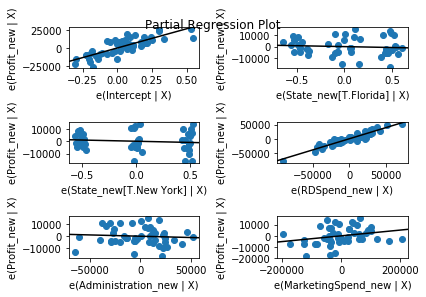

In [119]:
sm.graphics.plot_partregress_grid(model1_new)
plt.plot()



#### ADDED VARIABLE PLOT FOR ADMINISTRATION IS NOT SHOWING ANY SIGNIFICANCE..

In [123]:
model2 =smf.ols('Profit_new~ RDSpend_new+MarketingSpend_new',data=new_dataset).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Profit_new   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Tue, 04 Jun 2019   Prob (F-statistic):           3.74e-33
Time:                        17:56:44   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
RDSpend_new            0.7754      0.035     22.136      0.000       0.705       0.846
MarketingSpend_new     0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [124]:
model2.params

Intercept             49785.269847
RDSpend_new               0.775384
MarketingSpend_new        0.027446
dtype: float64

In [287]:
model2.conf_int(0.05)

,0,1
Intercept,45071.906084,54498.633611
RDSpend_new,0.704875,0.845893
MarketingSpend_new,0.001192,0.053699


#### APPLYING TRANSFORMATIONS SO THAT WE COULD GET MORE ADJUSTED RSQUARED VALUE

In [127]:
##Logarithmic Model

In [ ]:
model2_log1 = smf.ols("Profit_new~np.log(RDSpend_new)+np.log(MarketingSpend_new)",data=new_dataset).fit()
model2_log2 = smf.ols("Profit_new~np.log(RDSpend_new)+MarketingSpend_new",data=new_dataset).fit()
model2_log3 = smf.ols("Profit_new~RDSpend_new+np.log(MarketingSpend_new)",data=new_dataset).fit()
model2_log1.summary()
model2_log2.summary()
model2_log3.summary()

In [129]:
#1)Logarithmic models produce errors as the data contain 0 values in the data.
# 
# 2)This data can be replaced with the mean/median/mode but that may cause errors to pre written models.

In [130]:
# # Exponential Model

In [131]:
model2_exp = smf.ols("np.log(Profit_new)~RDSpend_new+MarketingSpend_new",data=new_dataset).fit()
model2_exp.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     np.log(Profit_new)   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     194.8
Date:                Tue, 04 Jun 2019   Prob (F-statistic):           3.49e-23
Time:                        18:04:18   Log-Likelihood:                 34.529
No. Observations:                  49   AIC:                            -63.06
Df Residuals:                      46   BIC:                            -57.38
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             10.9825      0.038    292.267      0.000      10.907      11.058
RDSpend_new         7.412e-06   5.62e-07     13.186      0.000    6.28e-06    8.54e-06
MarketingSpend_new   1.96e-07   2.09e-07      0.936      0.354   -2.25e-07    6.17e-07
==============================================================================
Omnibus:                       34.029   Durbin-Watson:                   0.650
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.452
Skew:                          -1.925   Prob(JB):                     1.02e-19
Kurtosis:                       8.292   Cond. No.                     5.52e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [132]:
# 1) The Exponential Model produces less R and R-Squared values when compared to default model.
# 
# 2) Hence we may consider the standard model to be our Final Model.
# 
# 3) In this case we take the standard model as Final Model due to less Complexity.

In [135]:
model2_pred= model2.predict(new_dataset)

In [136]:
model2_pred

0     190942.726927
1     188043.924520
2     179957.312472
3     172246.416164
4     170022.687457
5     161999.405410
6     157669.178690
7     159705.298181
8     151804.380605
9     153787.521922
10    135096.466868
11    134699.049858
12    129422.677987
13    128049.202655
14    149827.450777
15    145769.611357
16    117530.489091
17    130936.300519
18    129020.306206
19    116793.710748
20    117108.281313
21    118793.642939
22    115484.209637
23    110513.437292
24    113382.099441
25    103711.697086
26    111873.132740
27    115389.649335
28    104243.190309
29    103595.167960
30    100355.932697
31     99610.626757
32    100216.309933
33     98705.145163
34     91568.745065
35     91104.335025
36     77530.715090
37     89363.970985
38     70555.662763
39     84485.861451
40     76823.378730
41     75926.972539
42     72178.031523
43     62783.416125
44     67759.192437
45     50613.086380
46     58959.714353
47     49785.269847
48     50205.566671
dtype: float64

## CHECKING WHETHER RESUDUALS ARE NORMALLY DISTRIBUTED OR NOT

(array([ 3.,  0.,  2.,  8., 11.,  8.,  3.,  5.,  6.,  3.]),
 array([-2.23934723, -1.82933336, -1.41931948, -1.00930561, -0.59929174,
        -0.18927787,  0.220736  ,  0.63074987,  1.04076374,  1.45077761,
         1.86079148]),
 <a list of 10 Patch objects>)

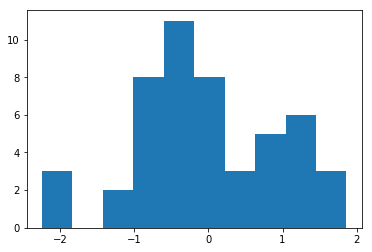

In [137]:
plt.hist(model2.resid_pearson)

In [138]:
# Q-Q Plot

[]

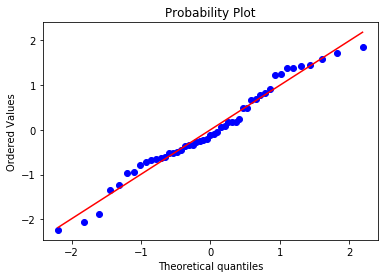

In [139]:
stats.probplot(model2.resid_pearson,dist="norm",plot=pylab)
plt.plot()



In [140]:
#1) The Q-Q plot line almost passes through the maximum number of residual Values.
# 2) But still we can see some s values slightly far from the regression Line,
#This is due to The presence of less number of datapoints.

## CHECKING HOMOSEDASTICITY

"""
What is the Assumption of Equal Variance?
The assumption of equal variances (i.e. assumption of homoscedasticity) assumes that different samples have the same variance, even if they came from different populations"""

#### RESIDUALS VS FITTED

Text(0, 0.5, 'Residual')

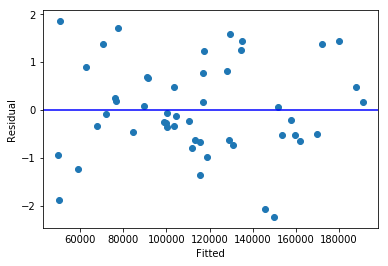

In [288]:
plt.scatter(model2_pred,model2.resid_pearson)
plt.axhline(y=0,color='Blue')
plt.xlabel("Fitted")
plt.ylabel("Residual")


##### RESIDUALS VS FITTED PLOT IS NOT IN CONE SHAPE .. THEREFORE IT IS HOMOSCEDASTIC..

Heteroscedasticity can also arise as a result of the presence of outliers.
The inclusion or exclusion of such observations, especially when the sample size is small, can substantially alter the results of regression analysis.
Heteroscedasticity arises from violating the assumption of CLRM (classical linear regression model), that the regression model is not correctly specified.
Skewness in the distribution of one or more regressors included in the model is another source of heteroscedasticity.
Incorrect data transformation, incorrect functional form (linear or log-linear model) is also the source of heteroscedasticity


Consequences of Heteroscedasticity
The OLS estimators and regression predictions based on them remains unbiased and consistent.
The OLS estimators are no longer the BLUE (Best Linear Unbiased Estimators) because they are no longer efficient, so the regression predictions will be inefficient too.
Because of the inconsistency of the covariance matrix of the estimated regression coefficients, the tests of hypotheses, (t-test, F-test) are no longer valid."""

In [143]:
##-->Observed Values vs Fitted(Predicted) values


Text(0, 0.5, 'Fitted')

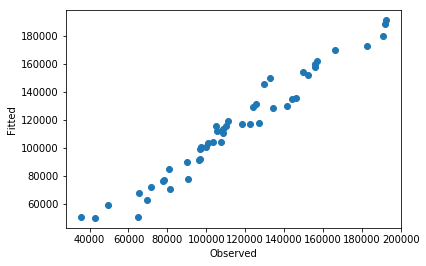

In [144]:
plt.scatter(Profit_new,model2_pred)
plt.xlabel("Observed")
plt.ylabel("Fitted")


1) The predicted values are uniformly distributed across the given data.

C:\Users\kumar\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


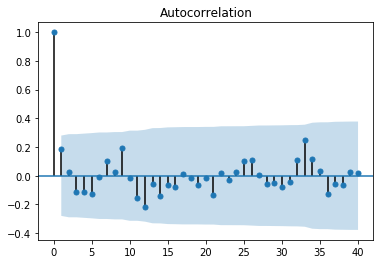

In [293]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(model2.resid_pearson, lags=40 , alpha=0.05)
acf.show()

In [294]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(model2.resid)

1.546074105671031

In [295]:
# minor values (1-2) so there may be chance of better tuning the model and best suits  for time series models..

In [145]:
### Splitting the data into train and test data 


In [154]:
dataset_train,dataset_test  = train_test_split(new_dataset.iloc[:,::-2],test_size = 0.2)
dataset_train.columns


Index(['Profit', 'Marketing Spend', 'R&D Spend'], dtype='object')

In [163]:
dataset_train

,Profit,Marketing Spend,R&D Spend
7,155752.60,323876.68,130298.13
17,125370.37,282574.31,94657.16
48,35673.41,0.00,542.05
22,110352.25,303319.26,73994.56
45,64926.08,1903.93,1000.23
10,146121.95,229160.95,101913.08
14,132602.65,256512.92,119943.24
21,111313.02,299737.29,78389.47
27,105008.31,353183.81,72107.60
29,101004.64,107138.38,65605.48


In [171]:
tProfit= dataset_train['Profit']
tRDSpend= dataset_train['R&D Spend']
tMarketingSpend=dataset_train['Marketing Spend']

In [184]:
model_train = smf.ols('tProfit~tRDSpend+tMarketingSpend',data=dataset_train).fit()
train_pred = model_train.predict(dataset_train)
train_resid = train_pred - dataset_train['Profit']
train_rmse = np.sqrt(np.mean(train_resid*train_resid))
train_rmse


7354.25630789658

In [179]:
teProfit=dataset_test['Profit']
teRDSpend= dataset_test['R&D Spend']
teMarketingSpend=dataset_test['Marketing Spend']

In [186]:
model_test = smf.ols('teProfit~teRDSpend+teMarketingSpend',data=dataset_test).fit()
test_pred = model_test.predict(dataset_test)
test_resid = test_pred - dataset_test['Profit']
test_rmse = np.sqrt(np.mean(test_resid*test_resid))
test_rmse



7443.99298133912

In [214]:
new_dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [219]:
x=new_dataset.iloc[:,:3].values
y=new_dataset.iloc[:,4].values

In [221]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41])

In [222]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)


In [223]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)
accuracy=regressor.score(x_test,y_test)
print((accuracy*100))



97.00730432596352


# Underfitting – Validation and training error high


### AS THE DATASET VALUES ARE LESS THAN 1OOO MODEL BECAME UNDERFITTING

#### to overcome underfitting we divide the test size into more


In [277]:
dataset_train,dataset_test  = train_test_split(new_dataset.iloc[:,::-2],test_size = 0.30)
dataset_train.columns

Index(['Profit', 'Marketing Spend', 'R&D Spend'], dtype='object')

In [278]:
tProfit= dataset_train['Profit']
tRDSpend= dataset_train['R&D Spend']
tMarketingSpend=dataset_train['Marketing Spend']

In [279]:
model_train = smf.ols('tProfit~tRDSpend+tMarketingSpend',data=dataset_train).fit()
train_pred = model_train.predict(dataset_train)
train_resid = train_pred - dataset_train['Profit']
train_rmse = np.sqrt(np.mean(train_resid*train_resid))
train_rmse


7185.815045500319

In [280]:
teProfit=dataset_test['Profit']
teRDSpend= dataset_test['R&D Spend']
teMarketingSpend=dataset_test['Marketing Spend']

In [281]:
model_test = smf.ols('teProfit~teRDSpend+teMarketingSpend',data=dataset_test).fit()
test_pred = model_test.predict(dataset_test)
test_resid = test_pred - dataset_test['Profit']
test_rmse = np.sqrt(np.mean(test_resid*test_resid))
test_rmse



7297.865498566233

In [282]:
x=new_dataset.iloc[:,:3].values
y=new_dataset.iloc[:,4].values

In [283]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=0)


In [284]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)
accuracy=regressor.score(x_test,y_test)
print((accuracy*100))



94.23501956468417


#### ACCURACY IS MORE FOR TEST SIZE 0.2  

# WE SATISFIED ASSUMPTIONS::
# 1.LINEARITY 2.MULTIVARIATE NORMALITY
# 3. NO MULTICOLLINEARITY
# 4 .HOMOSEDASTICITY

#### OUR FINAL MODEL IS MODEL2 AND DATASET IS NEW_DATASET, GOOD FIT MODEL AS TEST ERROR IS SLIGHTKY GREATER THAN TRAIN ERROR